In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('kaggle_fake_train.csv')

# **Exploring the dataset**

In [3]:
df.shape

(20800, 5)

In [4]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df.drop('id', axis=1, inplace=True)

In [8]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

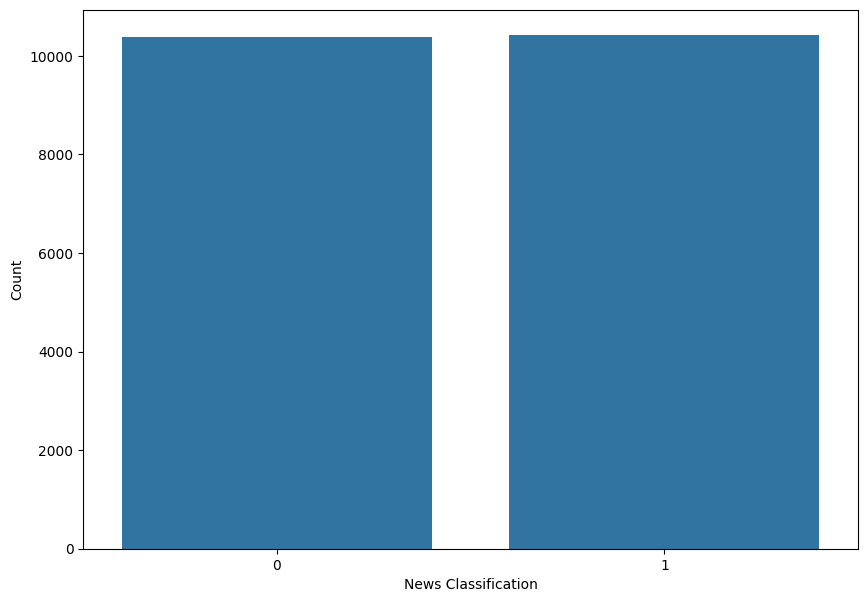

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')

# **Data Cleaning and Preprocessing**

In [11]:
print(df.shape)

(20800, 4)


In [12]:
df.isna().any()

title      True
author     True
text       True
label     False
dtype: bool

In [13]:
df.dropna(inplace=True)
print(df.shape)

(18285, 4)


In [14]:
news = df.copy()

In [15]:
news.reset_index(inplace=True)

In [16]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sameer_Sayed\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [17]:
corpus = []
ps = PorterStemmer()

for i in range(0,news.shape[0]):

  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])

  title = title.lower()

  words = title.split()

  words = [word for word in words if word not in set(stopwords.words('english'))]

  words = [ps.stem(word) for word in words]

  title = ' '.join(words)

  corpus.append(title)

In [18]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [20]:
X.shape

(18285, 5000)

In [21]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(10, 5000))

In [22]:
y = news['label']

# **Model Building**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## *Multinomial Naive Bayes*

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [25]:
nb_y_pred = nb_classifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 90.16%
Precision score is: 0.87
Recall score is: 0.91


In [27]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [28]:
nb_cm

array([[1825,  215],
       [ 145, 1472]])

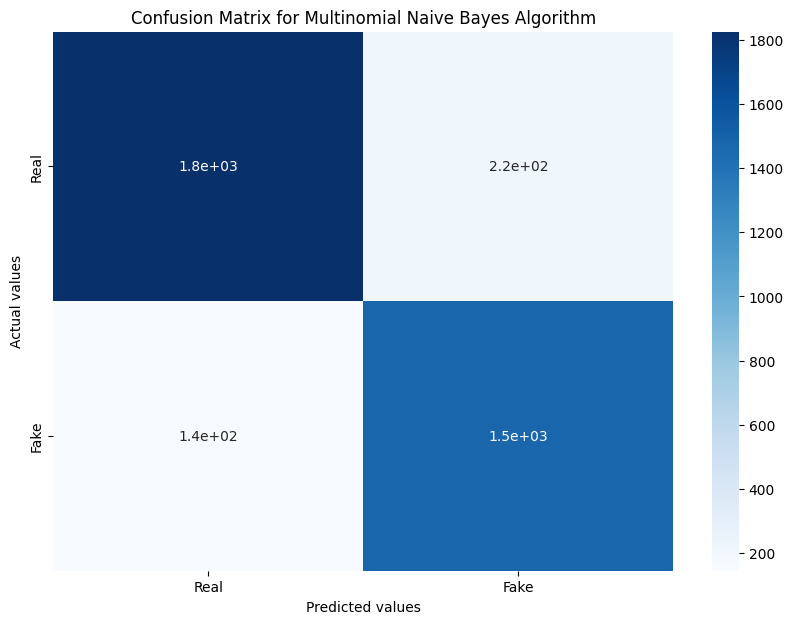

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [30]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 90.4%
Accuracy score for alpha=0.2 is: 90.43%
Accuracy score for alpha=0.3 is: 90.43%
Accuracy score for alpha=0.4 is: 90.32%
Accuracy score for alpha=0.5 is: 90.29%
Accuracy score for alpha=0.6 is: 90.18%
Accuracy score for alpha=0.7 is: 90.18%
Accuracy score for alpha=0.8 is: 90.18%
Accuracy score for alpha=0.9 is: 90.16%
Accuracy score for alpha=1.0 is: 90.16%
--------------------------------------------
The best accuracy is 90.43% with alpha value as 0.2


## *Logistic Regression*

In [31]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
lr_y_pred = lr_classifier.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 93.57%
Precision score is: 0.89
Recall score is: 0.97


In [34]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [35]:
lr_cm

array([[1855,  185],
       [  50, 1567]])

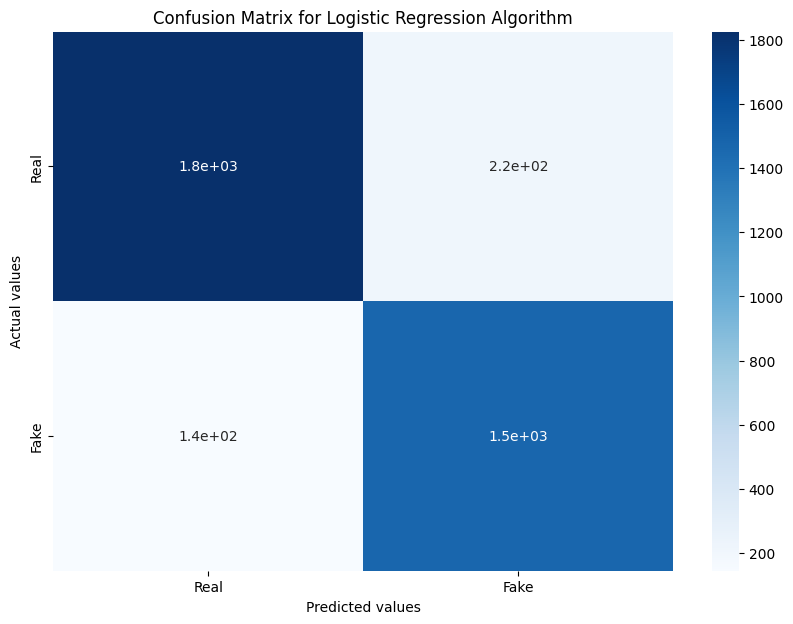

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [37]:
best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = LogisticRegression(C=i, random_state=0)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    c_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(c_val,1)))

Accuracy score for C=0.1 is: 92.02%
Accuracy score for C=0.2 is: 92.92%
Accuracy score for C=0.3 is: 93.22%
Accuracy score for C=0.4 is: 93.55%
Accuracy score for C=0.5 is: 93.63%
Accuracy score for C=0.6 is: 93.63%
Accuracy score for C=0.7 is: 93.57%
Accuracy score for C=0.8 is: 93.57%
Accuracy score for C=0.9 is: 93.57%
Accuracy score for C=1.0 is: 93.57%
--------------------------------------------
The best accuracy is 93.63% with C value as 0.5


In [38]:
classifier = LogisticRegression(C=0.8, random_state=0)
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.8
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# **Predictions**

In [39]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return classifier.predict(temp)

In [41]:
df_test = pd.read_csv('kaggle_fake_test.csv')

In [42]:
df_test.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [43]:
news_title = df_test['title']

In [44]:
news_title.shape

(5200,)

In [45]:
from random import randint

In [46]:
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Senate Passes Bill Exposing Saudi Arabia to 9/11 Legal Claims - The New York Times
Prediction: This is a REAL news.


In [47]:
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Krauthammer on Coulter at Berkeley: ’Reaching a Situation Where’ ’Fascist Gangs Can Shut Down Free Speech’ - Breitbart
Prediction: This is a REAL news.


In [48]:
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Education System Broken: Let’s Try ‘Ed-Exit’
Prediction: This is a FAKE news!


In [49]:
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Aleksei Navalny, Putin Critic, Says He’ll Run for President of Russia - The New York Times
Prediction: This is a REAL news.
